In [1]:
%matplotlib inline

import sys
sys.path.insert(0, '../')
import BrasilUSP_iGEM_LabLib as LabLib


import pylab as pl
import numpy as np

Defining the wells names:

In [2]:
legenda = {
    0 : 'PBS',
    1 : 'PBS+Gfp',
    2 : 'PBS+Amp10',
    3 : 'PBS+Amp50',
    4 : 'PBS+Amp100',
    5 : 'LB',
    6 : 'LB+Gfp',
    7 : 'LB+Amp50'
}

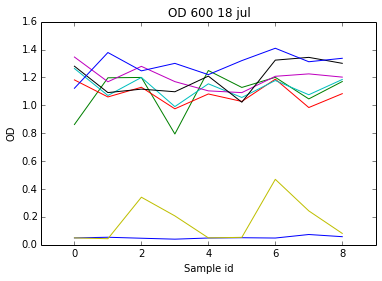

In [4]:
filename = 'placa transparente OD 600 18 jul.txt'
Times, OD1 = LabLib.ReadFluor_nanomed(filename)
LabLib.ODplot( OD1[0], title='OD 600 18 jul' )

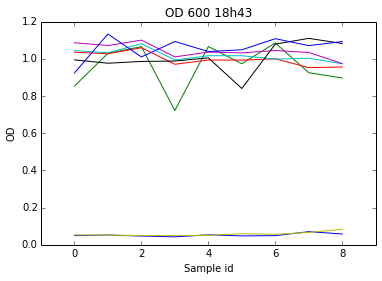

In [5]:
filename = 'placa transparente OD 600 18h43.txt'
Times, OD2 = LabLib.ReadFluor_nanomed(filename)
LabLib.ODplot( OD2[0], title='OD 600 18h43' )

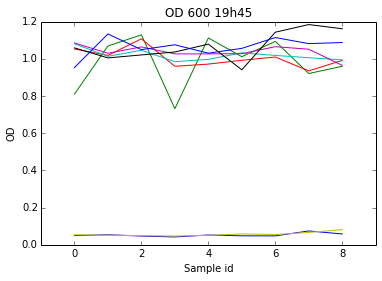

In [6]:
filename = 'placa transparente OD 600 19h45.txt'
Times, OD3 = LabLib.ReadFluor_nanomed(filename)
LabLib.ODplot( OD3[0], title='OD 600 19h45' )

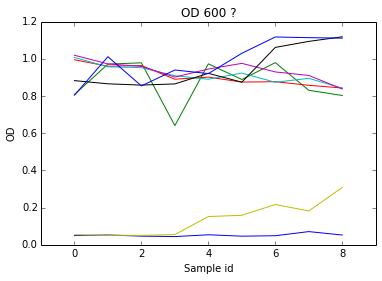

In [7]:
filename = 'placa transparente OD 600.txt'
Times, OD4 =LabLib.ReadFluor_nanomed(filename)
LabLib.ODplot( OD4[0], title='OD 600 ?' )

In [20]:
reload( LabLib )

<module 'BrasilUSP_iGEM_LabLib' from '../BrasilUSP_iGEM_LabLib.py'>

In [41]:
filename = 'placa 4 horas fluores.txt'
Times, Data = LabLib.ReadFluor_nanomed(filename)
NData = LabLib.normalizeByOD(Data, OD1)
m = LabLib.AbsorbLineReading(Times, NData)

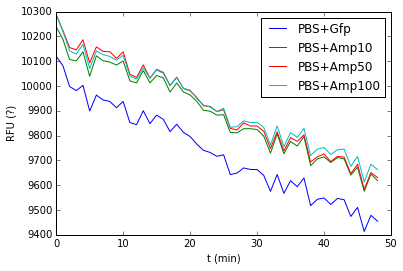

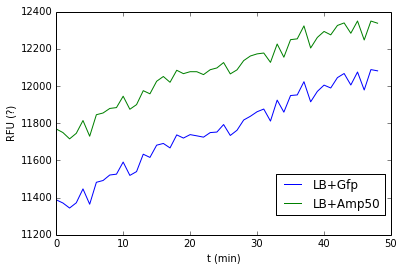

In [60]:
for j in range(1,5):
    pl.plot(m[j,:], label=legenda[j])

pl.xlabel('t (min)')
pl.ylabel('RFU (?)')
pl.legend()
pl.show()

pl.plot(m[6,:], label=legenda[6])
pl.plot(m[7,:], label=legenda[7])
pl.xlabel('t (min)')
pl.ylabel('RFU (?)')
pl.legend(bbox_to_anchor=(1, 0.3))
pl.show()

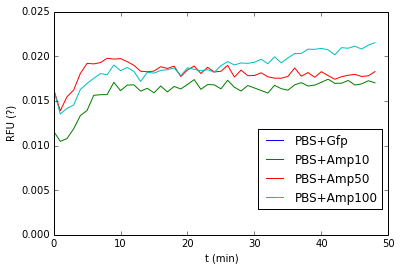

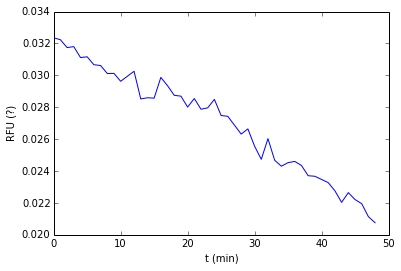

In [63]:
for j in range(1,5):
    pl.plot( np.divide( m[j,:] - m[1,:] , m[j,:]), label=legenda[j])

pl.xlabel('t (min)')
pl.ylabel('RFU (?)')
pl.legend(bbox_to_anchor=(1, 0.5),)
pl.show()

pl.plot( np.divide( m[7,:] - m[6,:], m[7,:] ) )
pl.xlabel('t (min)')
pl.ylabel('RFU (?)')
pl.show()